In [1]:
#Load libraries

import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import shap
import lime
import lime.lime_tabular
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
#print('done')

In [2]:
#Load income dataset
df = pd.read_csv('D:/SDU/thesisCodes/data/datasets_180_408_data.csv') #

def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]
    
    # if value in radius column is null
    if pd.isnull(radius):
        
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17
        # if woman was not diagnosed with breast cancer
        else:
            return 12
    # when value in radius column is not null
    else:
        # return that same value
        return radius
    
df['radius_mean'] = df[['radius_mean', 'diagnosis']].apply(impute_radius, axis = 1)

df.drop(['id'], axis = 1, inplace = True)
df['diagnosis'] = [1 if x == 'M' else 0 for x in df['diagnosis']]


In [3]:
#df.info()
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [4]:
X = df.drop('diagnosis', axis = 1)
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [5]:
#Build the random forest classifier
rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)

yPredRf = rf.predict(X_test)
print(metrics.classification_report(Y_test, yPredRf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Text(0, 0.5, 'Cross-validated accuracy')

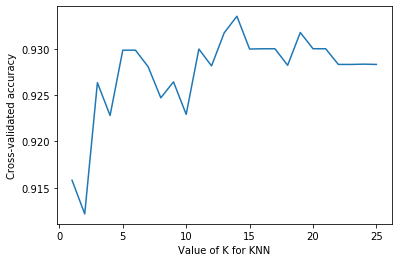

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
    
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [7]:
#Train the model and predict for K=14
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)
yPredKNN = knn.predict(X_test)

#classification report for test set
print(metrics.classification_report(Y_test, yPredKNN))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [8]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

yPredGNB = gnb.predict(X_test)

#classification report for test set
print(metrics.classification_report(Y_test, yPredGNB))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [9]:
xgbModel = xgb.XGBClassifier(random_state=1)
xgbModel.fit(X_train, Y_train)
yPredXGB = xgbModel.predict(X_test)
print(metrics.classification_report(Y_test, yPredXGB))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [10]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

yPredSVM = svclassifier.predict(X_test)
print(metrics.classification_report(Y_test, yPredSVM))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [16]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  training_labels=df['diagnosis'], class_names=['Benign', 'Malignant'], verbose=True, mode='classification')

j = 8
print("KNN ", "Predicted: ", yPredKNN[j], " ", "Actual: ", Y_test.values[j])
exp = explainer.explain_instance(X_test.values[j], knn.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

print("GNB ", "Predicted: ", yPredGNB[j], " ", "Actual: ", Y_test.values[j])
exp = explainer.explain_instance(X_test.values[j], gnb.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

print("RF ", "Predicted: ", yPredRf[j], " ", "Actual: ", Y_test.values[j])
exp = explainer.explain_instance(X_test.values[j], rf.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)


KNN  Predicted:  0   Actual:  0
Intercept 0.5797634112223243
Prediction_local [0.1937484]
Right: 0.0


GNB  Predicted:  0   Actual:  0
Intercept 0.7982106876728564
Prediction_local [0.81251258]
Right: 0.3297034848168803


RF  Predicted:  1   Actual:  0
Intercept 0.4154059014827267
Prediction_local [0.50528444]
Right: 0.7


Requested sample size larger than
                              size of input data. Using all data


Intercept 0.43003413403501467
Prediction_local [0.85114794]
Right: 1.0
Intercept 0.4442546218409807
Prediction_local [0.58183822]
Right: 0.5
Intercept 0.39114786457025175
Prediction_local [0.92584064]
Right: 1.0
Intercept 0.42809535786408964
Prediction_local [0.85461084]
Right: 1.0
Intercept 0.25371081466030754
Prediction_local [1.11149725]
Right: 1.0
Intercept 0.43970628158062164
Prediction_local [0.75896651]
Right: 1.0
Intercept 0.40082493365214233
Prediction_local [0.87987158]
Right: 1.0
Intercept 0.2621170496703009
Prediction_local [1.10965661]
Right: 1.0
Intercept 0.3902209988700499
Prediction_local [0.92770856]
Right: 1.0
Intercept 0.42818252454478917
Prediction_local [0.84428581]
Right: 1.0
Intercept 0.40272273205100534
Prediction_local [0.91346148]
Right: 1.0
Intercept 0.5271604186727761
Prediction_local [0.54391684]
Right: 0.7857142857142857
Intercept 0.5381566524858535
Prediction_local [0.52747622]
Right: 0.6428571428571429
Intercept 0.5552970314012317
Prediction_local [0.425

Intercept 0.2580051888664413
Prediction_local [1.09894062]
Right: 1.0
Intercept 0.4096638745825404
Prediction_local [0.90202263]
Right: 0.9285714285714286
Intercept 0.42897125757557286
Prediction_local [0.84803478]
Right: 1.0
Intercept 0.399815812544305
Prediction_local [0.70922182]
Right: 0.5
Intercept 0.5358659363076077
Prediction_local [0.49628224]
Right: 0.7142857142857143
Intercept 0.40493841865451163
Prediction_local [0.88155219]
Right: 1.0
Intercept 0.26322256335378924
Prediction_local [1.08755218]
Right: 1.0
Intercept 0.2479276911250539
Prediction_local [1.1330803]
Right: 1.0
Intercept 0.2600877641919219
Prediction_local [1.08908742]
Right: 1.0
Intercept 0.5341087767762217
Prediction_local [0.51855879]
Right: 0.6428571428571429
Intercept 0.3980082366781326
Prediction_local [0.91669671]
Right: 1.0
Intercept 0.42853922052674487
Prediction_local [0.81013466]
Right: 0.9285714285714286
Intercept 0.405527181468331
Prediction_local [0.90249788]
Right: 1.0
Intercept 0.4513824446919186


Intercept 0.42768206955112364
Prediction_local [0.57679207]
Right: 0.5714285714285714
Intercept 0.38263878561314224
Prediction_local [0.97344807]
Right: 0.9285714285714286
Intercept 0.4497188701176439
Prediction_local [0.77870017]
Right: 0.9285714285714286
Intercept 0.2760577593953958
Prediction_local [1.05931329]
Right: 1.0
Intercept 0.45985955492829533
Prediction_local [0.51055438]
Right: 0.6428571428571429
Intercept 0.39528466860145306
Prediction_local [0.92992599]
Right: 1.0
Intercept 0.2505027391350278
Prediction_local [1.12397069]
Right: 1.0
Intercept 0.4357610100337841
Prediction_local [0.84412849]
Right: 0.9285714285714286
Intercept 0.5373906902031856
Prediction_local [0.48984929]
Right: 0.9285714285714286
Intercept 0.2687290488196075
Prediction_local [1.06680509]
Right: 1.0
Intercept 0.4356695233710891
Prediction_local [0.82160103]
Right: 1.0
Intercept 0.24953100797420438
Prediction_local [1.12848363]
Right: 1.0
Intercept 0.4054890043867048
Prediction_local [0.6795021]
Right: 

Right: 0.8571428571428571
Intercept 0.4304493603570694
Prediction_local [0.83811571]
Right: 1.0
Intercept 0.49714356268604265
Prediction_local [0.59441761]
Right: 0.9285714285714286
Intercept 0.410383095674792
Prediction_local [0.88553244]
Right: 1.0
Intercept 0.5769008711617872
Prediction_local [0.34534258]
Right: 0.6428571428571429
Intercept 0.44350586913002543
Prediction_local [0.79286322]
Right: 1.0
Intercept 0.2532053005113124
Prediction_local [1.11134544]
Right: 1.0
Intercept 0.43918289885234
Prediction_local [0.83243639]
Right: 0.9285714285714286
Intercept 0.3922697520244731
Prediction_local [0.90701038]
Right: 1.0
Intercept 0.2534362020584974
Prediction_local [1.13513452]
Right: 0.8571428571428571
Intercept 0.36859870862942196
Prediction_local [0.98337488]
Right: 1.0
Intercept 0.4507441858775813
Prediction_local [0.51811407]
Right: 0.9285714285714286
Intercept 0.5564668148135778
Prediction_local [0.45158697]
Right: 0.7857142857142857
Intercept 0.4087585406018886
Prediction_loca

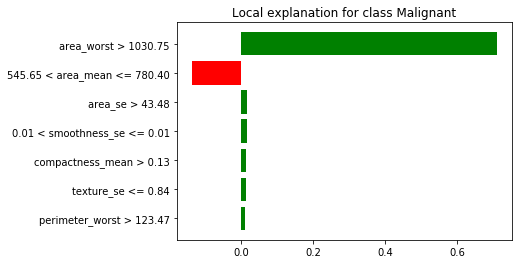

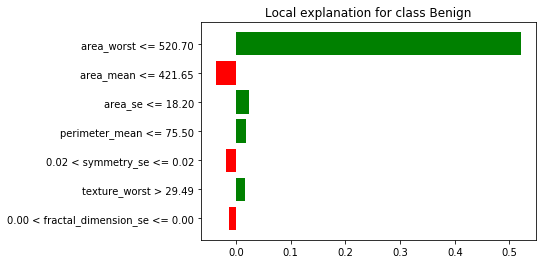

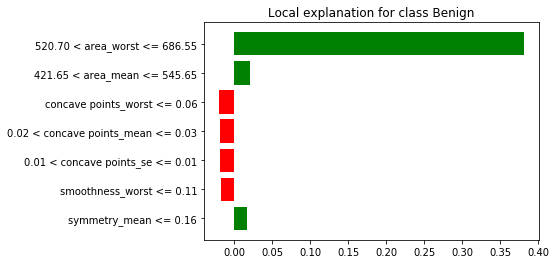

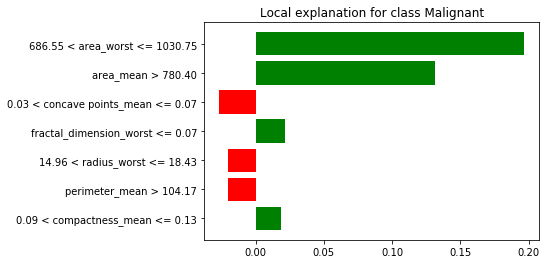

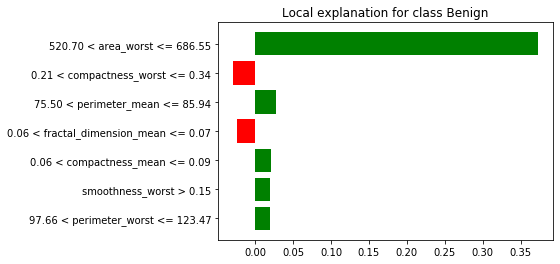

In [12]:
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, X_train.values, knn.predict_proba, sample_size=500, num_features=7, num_exps_desired=5)
#Plot the 5 explanations
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp_obj.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp_obj.explanations]

Requested sample size larger than
                              size of input data. Using all data


Intercept 0.5131348611782566
Prediction_local [1.67629038]
Right: 0.9999999999997113
Intercept 0.5113337958615669
Prediction_local [1.68327132]
Right: 1.0
Intercept 0.503986885476418
Prediction_local [1.70826142]
Right: 1.0
Intercept 0.04492803858870703
Prediction_local [0.65908602]
Right: 1.0
Intercept 0.4951349207693394
Prediction_local [1.72720662]
Right: 1.0
Intercept 0.4979980545418965
Prediction_local [1.697153]
Right: 1.0
Intercept 0.08134664978268023
Prediction_local [0.56019627]
Right: 1.0
Intercept 0.08411043409093126
Prediction_local [0.54936105]
Right: 0.9999999996775326
Intercept 0.2296855256029084
Prediction_local [0.09467579]
Right: 0.9997970332255461
Intercept 0.5256413503181441
Prediction_local [1.64271534]
Right: 1.0
Intercept 0.08777128335418329
Prediction_local [0.52614253]
Right: 0.9999999999950937
Intercept 0.06817078260558276
Prediction_local [0.58335911]
Right: 0.9999999999999991
Intercept 0.20363568561915085
Prediction_local [0.20261557]
Right: 0.99999994802204

Intercept 0.0694144617198782
Prediction_local [0.63001438]
Right: 1.0
Intercept 0.10036108669698486
Prediction_local [0.50596957]
Right: 0.9999999999986571
Intercept 0.8100832393313862
Prediction_local [0.78003759]
Right: 1.0
Intercept 0.12931140040091868
Prediction_local [0.39086886]
Right: 0.9999999999999889
Intercept 0.506494511531941
Prediction_local [1.67022738]
Right: 1.0
Intercept 0.07087147441194433
Prediction_local [0.55349114]
Right: 0.9999999999999982
Intercept 0.19574189369346723
Prediction_local [0.24357832]
Right: 0.7355267018592797
Intercept 0.10597893347368662
Prediction_local [0.51342564]
Right: 0.9999999999998312
Intercept 0.5019918978062943
Prediction_local [1.6792211]
Right: 1.0
Intercept 0.5081693147933632
Prediction_local [1.70355125]
Right: 1.0
Intercept 0.11642996033036955
Prediction_local [0.47997822]
Right: 0.9999999999988063
Intercept 0.504007516469972
Prediction_local [1.69192303]
Right: 1.0
Intercept 0.06730802752938148
Prediction_local [0.59742797]
Right: 

Prediction_local [0.44748054]
Right: 0.9999999976014173
Intercept 0.08250470350209903
Prediction_local [0.55285549]
Right: 0.9999999999994209
Intercept 0.5084913159913812
Prediction_local [1.66919835]
Right: 1.0
Intercept 0.08953672556106747
Prediction_local [0.53897967]
Right: 0.9999999998581117
Intercept 0.49375437459471017
Prediction_local [1.70867723]
Right: 1.0
Intercept 0.08574440040552352
Prediction_local [0.5150787]
Right: 0.9999999999999396
Intercept 0.7231086337610004
Prediction_local [1.01543051]
Right: 0.9999999954928747
Intercept 0.11573576619219555
Prediction_local [0.44774601]
Right: 0.9999994838360529
Intercept 0.5152379873601344
Prediction_local [1.67903162]
Right: 1.0
Intercept 0.5649056619450255
Prediction_local [1.49960159]
Right: 1.0
Intercept 0.07042199884654399
Prediction_local [0.57249766]
Right: 0.9999999999999964
Intercept 0.549224492505471
Prediction_local [1.5499174]
Right: 0.9999999999999716
Intercept 0.0869504224431807
Prediction_local [0.55429446]
Right: 

Right: 0.9999999682043393
Intercept 0.07109813506508966
Prediction_local [0.5847355]
Right: 0.9999999999998295
Intercept 0.11161662474567195
Prediction_local [0.48277053]
Right: 0.9999999999922444
Intercept 0.07343763468334066
Prediction_local [0.57265163]
Right: 0.9999999999999982
Intercept 0.07181337772421045
Prediction_local [0.57643704]
Right: 0.9999999999583409
Intercept 0.0902841528594157
Prediction_local [0.51342932]
Right: 0.9999999999998046
Intercept 0.15008524717176142
Prediction_local [0.37681777]
Right: 0.999999818373179
Intercept 0.5246443711614123
Prediction_local [1.66225688]
Right: 1.0
Intercept 0.09444935530966979
Prediction_local [0.51171525]
Right: 0.9999999999821316
Intercept 0.06705764109040738
Prediction_local [0.59279913]
Right: 0.9999999999976987
Intercept 0.6259967093107431
Prediction_local [1.33835346]
Right: 0.9999989327008116
Intercept 0.06542119362649124
Prediction_local [0.64768102]
Right: 1.0
Intercept 0.5083816552957328
Prediction_local [1.69833696]
Righ

Prediction_local [1.71091332]
Right: 1.0
Intercept 0.4952328679143366
Prediction_local [1.71727841]
Right: 1.0
Intercept 0.5131012387284968
Prediction_local [1.66933583]
Right: 0.9999998969108841
Intercept 0.08986723948299302
Prediction_local [0.5302597]
Right: 0.9999999999998987
Intercept 0.5385642446540602
Prediction_local [1.57214975]
Right: 1.0
Intercept 0.07041439380714576
Prediction_local [0.59585618]
Right: 0.9999999999997691
Intercept 0.110950512900888
Prediction_local [0.49035057]
Right: 0.9999995715431259
Intercept 0.09530433627873704
Prediction_local [0.48846765]
Right: 0.9999999999999911
Intercept 0.5076669342978555
Prediction_local [1.70584436]
Right: 1.0
Intercept 0.48819382823511825
Prediction_local [1.71606272]
Right: 1.0
Intercept 0.20033156292512924
Prediction_local [0.20184159]
Right: 0.6438386321843683
Intercept 0.5274544609547862
Prediction_local [1.6262839]
Right: 1.0
Intercept 0.49726956039208564
Prediction_local [1.71056881]
Right: 1.0
Intercept 0.52346244474566

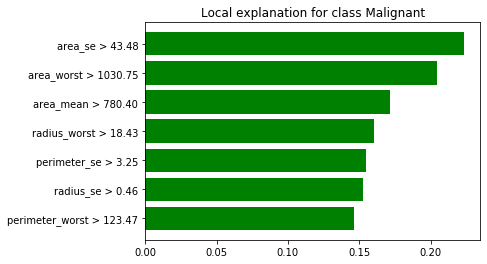

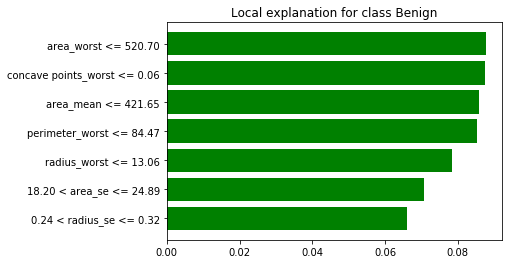

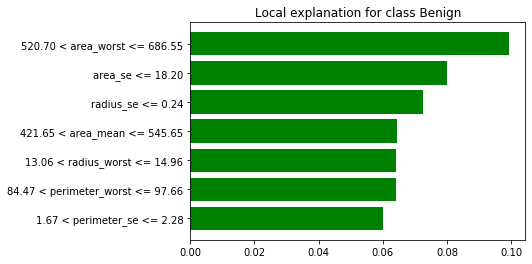

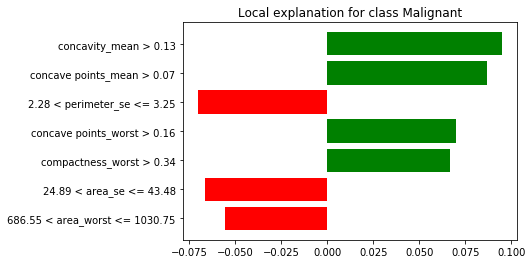

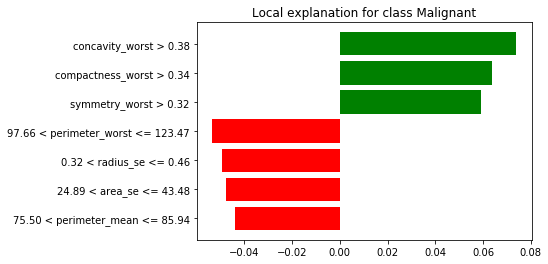

In [13]:
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, X_train.values, gnb.predict_proba, sample_size=500, num_features=7, num_exps_desired=5)
#Plot the 5 explanations
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp_obj.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp_obj.explanations]

In [14]:
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, X_train.values, rf.predict_proba, sample_size=500, num_features=7, num_exps_desired=5)
#Plot the 5 explanations
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp_obj.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp_obj.explanations]

Requested sample size larger than
                              size of input data. Using all data


Intercept 0.4989903744187979
Prediction_local [0.77048454]
Right: 0.9995475113122172
Intercept 0.46029109114864153
Prediction_local [0.88209707]
Right: 0.9976607188593871
Intercept 0.47368994352934024
Prediction_local [0.84369062]
Right: 0.9995475113122172
Intercept 0.47626716355817666
Prediction_local [0.83000239]
Right: 0.9995475113122172
Intercept 0.5320655692646136
Prediction_local [0.65940161]
Right: 0.8995475113122172
Intercept 0.5131002510110722
Prediction_local [0.71493203]
Right: 0.8281189398836457
Intercept 0.3669803435066919
Prediction_local [0.65243994]
Right: 1.0
Intercept 0.32872019322069895
Prediction_local [0.75699123]
Right: 1.0
Intercept 0.4273761955473288
Prediction_local [0.46078822]
Right: 0.725
Intercept 0.5093236961986046
Prediction_local [0.72965535]
Right: 0.8995475113122172
Intercept 0.3830538949641142
Prediction_local [0.56959162]
Right: 0.9
Intercept 0.4684878785913098
Prediction_local [0.86107677]
Right: 0.9963786675773356
Intercept 0.535736119518259
Predic

KeyboardInterrupt: 